In [1]:
import anndata
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load data

### Load TCR sequencing data:

In [2]:
adata_tcr = ir.io.read_airr("data/RhapTCRBCRdemo/RhapTCRBCRdemo_VDJ_Dominant_Contigs_AIRR.tsv")

### Load corresponding transcriptomics data:

In [3]:
adata = sc.read_h5ad("data/RhapTCRBCRdemo/RhapTCRBCRdemo.h5ad")

adata

AnnData object with n_obs × n_vars = 7212 × 33470
    obs: 'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_D

### List AbSeq proteins

In [4]:
pd.DataFrame([x.split('|')[:3] for x in adata.var.index[adata.var.index.str.endswith("pAbO")]], columns=['Antibody', 'GeneSymbol', 'SeqID'])

,Antibody,GeneSymbol,SeqID
0,CCR7,CCR7,AHS0273
1,CD11b:M1_70,ITGAM,AHS0005
2,CD11c:B-LY6,ITGAX,AHS0056
3,CD127,IL7R,AHS0028
4,CD134:ACT35,TNFRSF4,AHS0013
5,CD137,TNFRSF9,AHS0003
6,CD14:MPHIP9,CD14,AHS0037
7,CD161:HP-3G10,KLRB1,AHS0205
8,CD16:3G8,FCGR3A,AHS0053
9,CD183,CXCR3,AHS0031


## Show tSNE embeddings

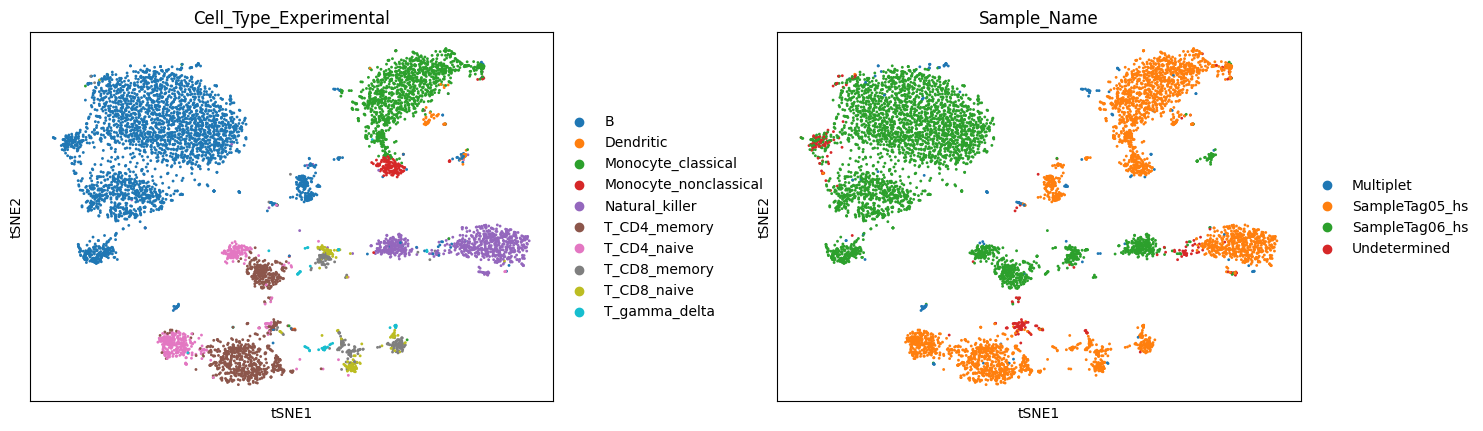

In [5]:
sc.pl.tsne(adata, color=["Cell_Type_Experimental", "Sample_Name"], wspace=0.3)

### Remove multiplets and undetermined cells:

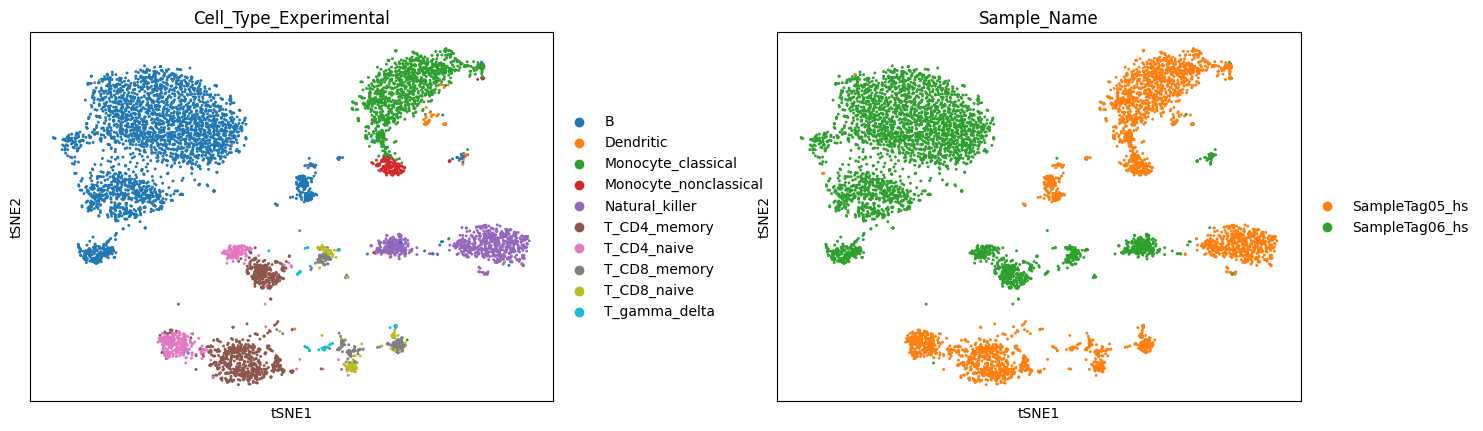

In [6]:
# Filter
adata = adata[~adata.obs["Sample_Name"].isin(["Multiplet", "Undetermined"])].copy()

# Show filtered
sc.pl.tsne(adata, color=["Cell_Type_Experimental", "Sample_Name"], wspace=0.3)

### Store both data types in a single MuData objectwith

`gex` = gene expression data 
`airr` = immune receptor data

In [7]:
mdata = mu.MuData({"gex": adata, "airr": adata_tcr})

mdata

MuData object with n_obs × n_vars = 7087 × 33470
  2 modalities
    gex:	6823 x 33470
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors'
      obsm:	'X_tsne'
    airr:	4590 x 0
      uns:	'scirpy_version'
      obsm:	'airr'

### Keep only cells which are present in both modalities:

In [8]:
mu.pp.intersect_obs(mdata)

mdata

MuData object with n_obs × n_vars = 4326 × 33470
  2 modalities
    gex:	4326 x 33470
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors'
      obsm:	'X_tsne'
    airr:	4326 x 0
      uns:	'scirpy_version'
      obsm:	'airr'

## Filtering and preprocessing of the transcriptomics data

### Filter low quality reads and low quality cells:

In [9]:
sc.pp.filter_genes(mdata["gex"], min_cells=10)
sc.pp.filter_cells(mdata["gex"], min_genes=100)

### Perform a simplified preprocessing workflow. For further information on preprocessing and clustering

please visit https://www.sc-best-practices.org/preamble.html for details and guidelines to more sophisticated preprocessing

In [10]:
sc.pp.normalize_total(mdata["gex"])
sc.pp.log1p(mdata["gex"])

sc.pp.highly_variable_genes(mdata["gex"], n_top_genes=5000)
sc.tl.pca(mdata["gex"])
sc.pp.neighbors(mdata["gex"])

### Update the MuData object to integrate the changes:

In [11]:
mdata.update()

## TCR preprocessing and quality control

### 1. Create chain indices

In [12]:
ir.pp.index_chains(mdata)

### 2. Quality control

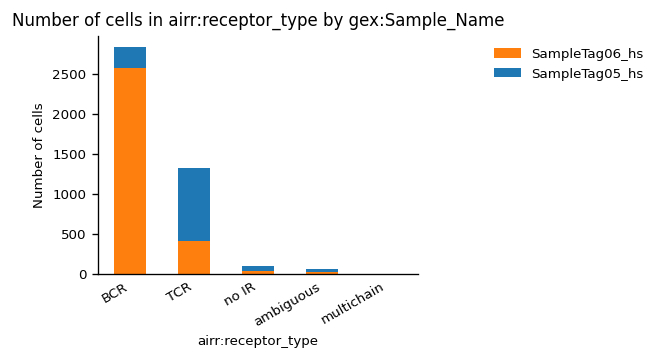

In [13]:
ir.tl.chain_qc(mdata)
_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_type", target_col="gex:Sample_Name")

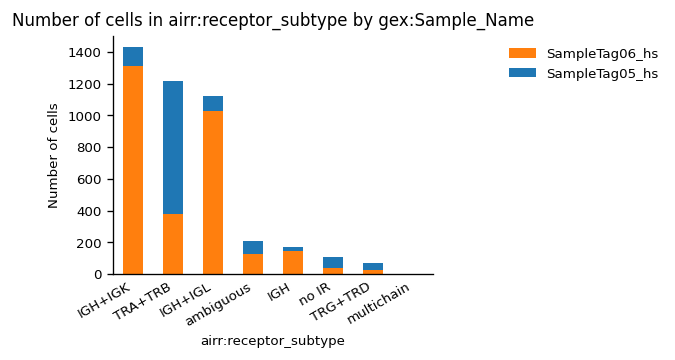

In [14]:
_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Sample_Name")

### 3. Remove multichains

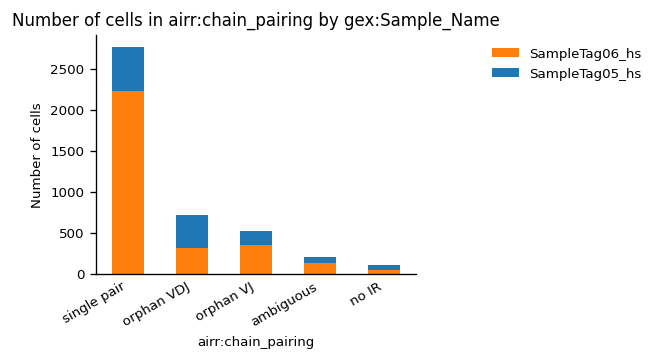

In [15]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")

_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Sample_Name")

In [16]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x == "single pair")

### 4. Filter for T-cells:

In [17]:
mu.pp.filter_obs(mdata, "gex:Cell_Type_Experimental", lambda x: np.isin(x, ["T_CD4_memory", "T_CD4_naive", "T_CD8_memory", "T_CD8_naive", "T_gamma_delta"]))

## Define clonotypes

### 1. Calculate distances based on the nucleic acid sequence identity:

In [18]:
ir.pp.ir_dist(mdata, metric='identity', sequence='nt')
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

  0%|          | 0/477 [00:00<?, ?it/s]

### 2. Compute layout and visualize network:

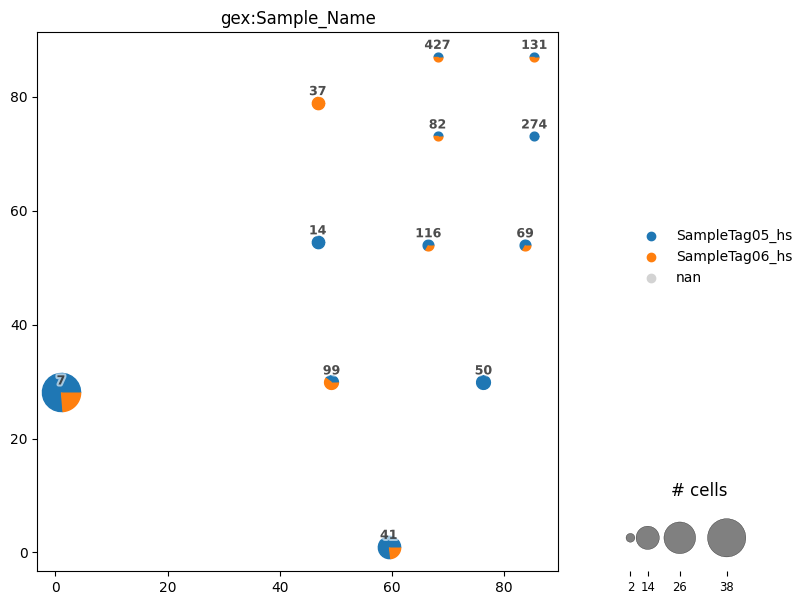

In [19]:
ir.tl.clonotype_network(mdata, min_cells=2)
_ = ir.pl.clonotype_network(mdata, color="gex:Sample_Name", base_size=20, label_fontsize=9, panel_size=(7, 7))

## Define clonotype clusters

In [20]:
ir.pp.ir_dist(mdata, metric="alignment", sequence="aa", cutoff=15)
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any")

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/477 [00:00<?, ?it/s]

### Generate and plot clonotype network

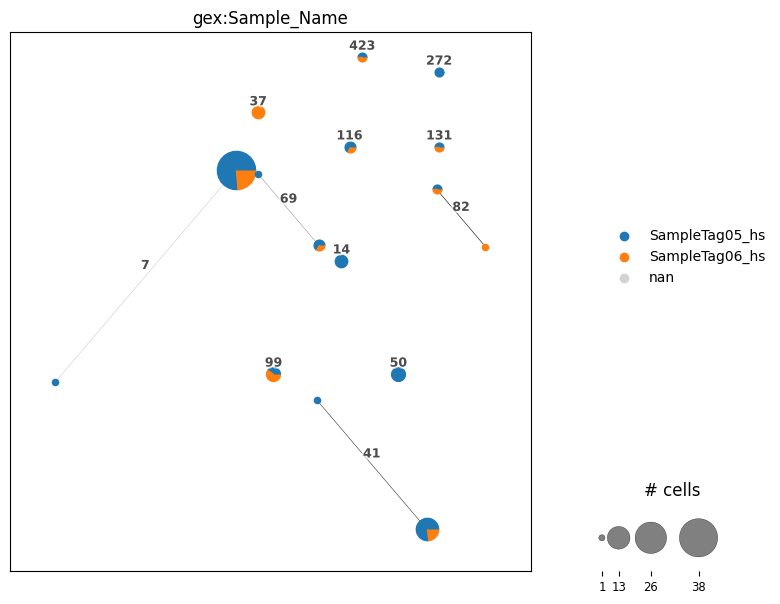

In [21]:
ir.tl.clonotype_network(mdata, min_cells=2, sequence="aa", metric="alignment")
_ = ir.pl.clonotype_network(mdata, color="gex:Sample_Name", label_fontsize=9, panel_size=(7, 7), base_size=20)

## Clonal expansion

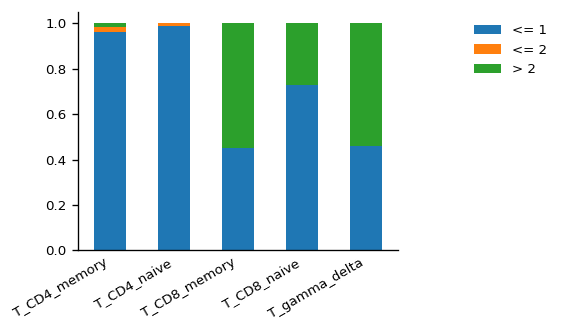

In [22]:
_ = ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:Cell_Type_Experimental")

## Alpha diversity

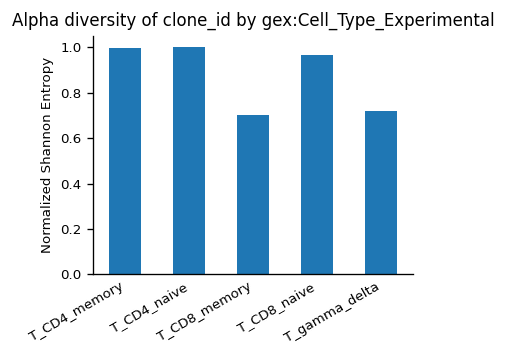

In [23]:
_ = ir.pl.alpha_diversity(mdata, metric="normalized_shannon_entropy", groupby="gex:Cell_Type_Experimental")

## Clonotype modularity

In [24]:
ir.tl.clonotype_modularity(mdata, target_col="airr:cc_aa_alignment")

  0%|          | 0/473 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

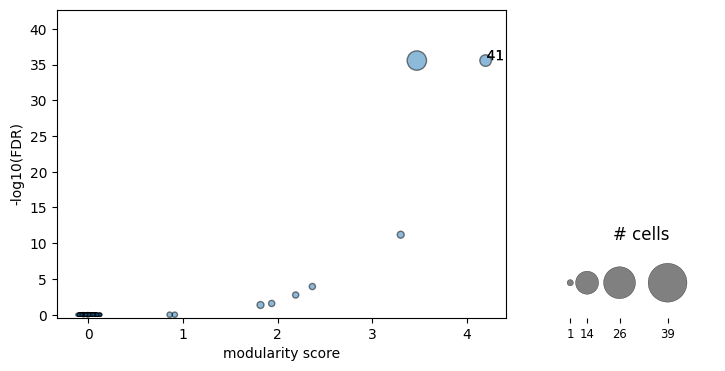

In [25]:
_ = ir.pl.clonotype_modularity(mdata, base_size=20)

### Extract information for clonotype 41:

In [26]:
clonotypes_top_modularity = list(
    mdata.obs.set_index("airr:cc_aa_alignment")["airr:clonotype_modularity"]
    .sort_values(ascending=False)
    .index.unique()
    .values[:1]
)

### Visualize in tSNE:

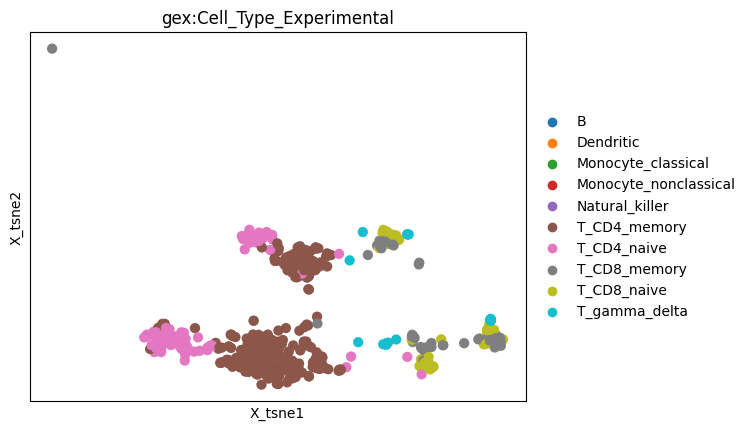

In [27]:
mu.pl.embedding(mdata, basis="gex:tsne", color=["gex:Cell_Type_Experimental"])

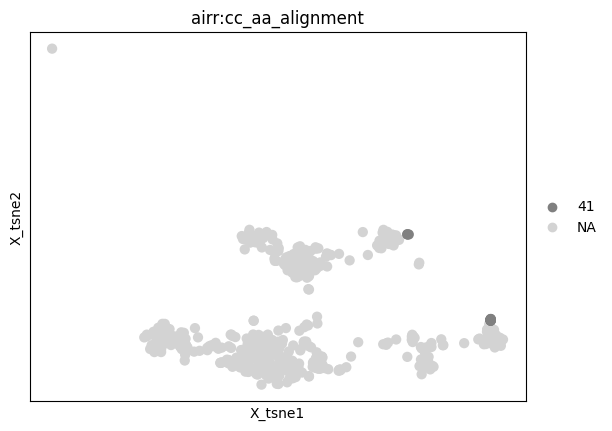

In [28]:
mu.pl.embedding(mdata, basis="gex:tsne", color="airr:cc_aa_alignment", groups=clonotypes_top_modularity)

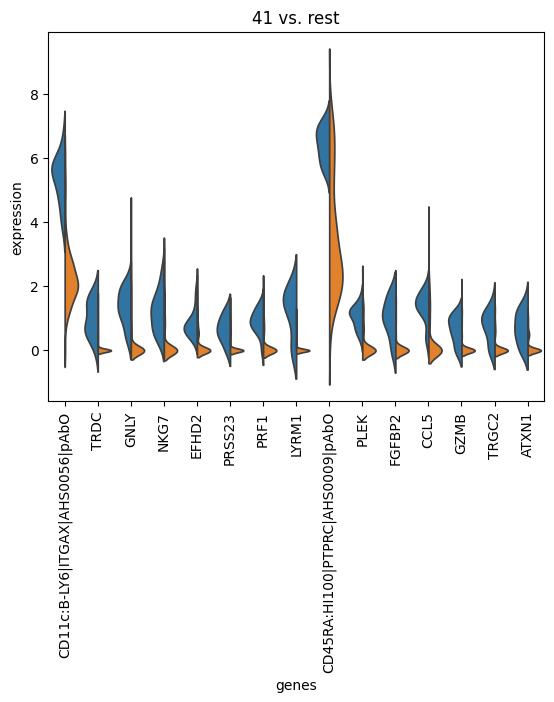

In [29]:
# Since sc.tl.rank_genes_group does not support MuData, we need to temporarily add
# the AIRR columns to the gene expression AnnData object
with ir.get.obs_context(mdata["gex"], {"cc_aa_alignment": mdata.obs["airr:cc_aa_alignment"]}) as tmp_ad:
    sc.tl.rank_genes_groups(
        tmp_ad,
        "cc_aa_alignment",
        groups=clonotypes_top_modularity,
        reference="rest",
        method="wilcoxon",
    )
    sc.pl.rank_genes_groups_violin(tmp_ad, groups=clonotypes_top_modularity, n_genes=15, show=False, strip=False)

## Marker genes in clonotypes

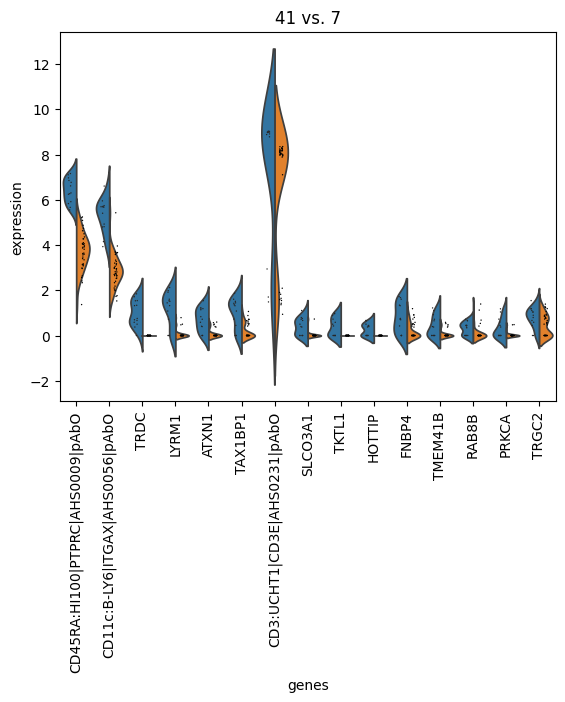

In [30]:
with ir.get.obs_context(mdata["gex"], {"clone_id": mdata.obs["airr:clone_id"]}) as tmp_ad:
    sc.tl.rank_genes_groups(tmp_ad, "clone_id", groups=["41"], reference="7", method="wilcoxon")
    sc.pl.rank_genes_groups_violin(tmp_ad, groups="41", n_genes=15)